# Linear Regression (Univariate)

## Model:
#### f w,b (x) = wx + b
## Cost Function:
### J(w,b) = 1/2m sum from i=1 to m (f w,b(xi)-yi)^2
## Gradient Descent:
### w := w - a . 1/m sum from i=1 to m (f w,b(xi)-yi) . xi
### b := b - a . 1/m sum from i=1 to m (f w,b(xi)-yi)

## Steps
### Training:
1. Initialize weight as zero
2. Initial bias as zero
### Given a data point:
1. Predict result by using f w,b (x) = wx + b or simple y^ = wx + b
2. Calculate Error
3. Use gradient descent to figure out new weight and bias values
4. Repeat n times
### Testing:
Given a data point:
 > Put in the values from the date point in the equation y^ = wx + b

### Importing Libraries

In [6]:
import numpy as np
import pandas as pd
!pip install matplotlib
import matplotlib.pyplot as plt

## Model Implementation

In [7]:
import numpy as np
class LinearRegression():
    def __init__(self, lr = 0.001, epochs = 1000):
        self.lr = lr
        self.epochs = epochs
        self.weight = None
        self.bias = None
        
        
    def fit(self,X,y):
        m = X.shape[0]
        self.weight = 0
        self.bias = 0
        epoch = []
        cost = []

        for i in range(self.epochs):
            y_pred = np.dot(X,self.weight) + self.bias
            cost.append(np.mean((y_pred - y)**2))
            epoch.append(i+1)
            
            dw = (1/m) * np.dot(X, (y_pred - y))
            db = (1/m) * np.sum(y_pred - y)

            self.weight = self.weight - ( self.lr * dw)
            self.bias = self.bias - (self.lr * db)

        plt.plot(epoch,cost,color = 'r')
        print(cost[-1])
    def predict(self, X):
        y_pred = np.dot(X,self.weight) + self.bias
        return y_pred
        
        
 

### Importing Dataset

In [8]:
dataset = pd.read_csv('Salary_Data.csv')
X,y = dataset.iloc[:,0], dataset.iloc[:,1]

### Splitting the Data into the Training and Test Sets

In [9]:
X_train, X_test = X[0:20], X[20:30]
y_train,y_test = y[0:20], y[20:30]

### Fitting the Model to the Training Set

36883552.15284631


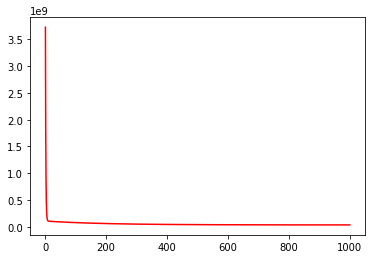

In [10]:
regressor = LinearRegression(0.02,1000)
regressor.fit(X_train, y_train)

### Predict the Test Set Results

In [11]:
y_pred = regressor.predict(X_test)

### Visualizing the Training Set results

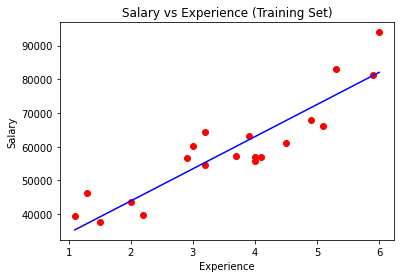

In [12]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'b')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

### Visualizing the Test Set results

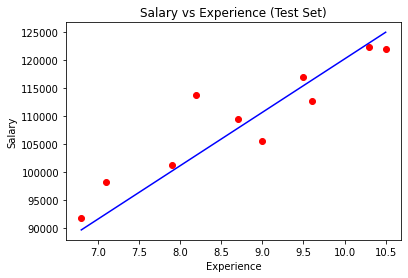

In [13]:
plt.scatter(X_test, y_test, color = 'r')
plt.plot(X_test,regressor.predict(X_test), color = 'b')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

In [17]:
class PLinearRgression():
        def __init__(self, lr = 0.001, epochs = 1000):
            self.lr = lr
            self.epochs = epochs
            self.weight = None
            self.bias = None
        
        def cartesian_to_polar(x, y):
            r = np.sqrt(x**2 + y**2)
            theta = np.arctan2(y, x)
            return r, theta
        
        def polar_to_cartesian(theta, r):
            x = r * np.cos(theta)
            y = r * np.sin(theta)
            return y
        
        def fit(self,X,y):
            r, theta = cartesian_to_polar(X,y)
            self.bias = 0
            self.weight = 0
            m = X.shape[0]
            for i in range(self.epochs):
                
                r_pred = self.bias / (np.sin(theta) - (self.weight * np.cos(theta)))

                dw = (1/m) * np.dot(theta, (r_pred - r))
                db = (1/m) * np.sum(r_pred - r)

                self.weight = self.weight - ( self.lr * dw)
                self.bias = self.bias - (self.lr * db)
            
            
        def predict(self,X):
            r, theta = cartesian_to_polar(X,y)
            r_pred = self.bias / (np.sin(theta) - (self.weight * np.cos(theta)))
            return polar_to_cartesian(theta, r_pred)
        
reg = PLinearRgression()
reg.fit(X,y)

predict = reg.predict(X)
            


NameError: name 'cartesian_to_polar' is not defined

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class LinearRegression:
    def __init__(self, learning_rate = 0.001, epochs = 1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
            m = X.shape[0]
            self.w = 0
            self.b = 0
            costs = []
            it = []
            for epoch in range(self.epochs):
                y_pred = np.dot(X,self.w) + self.b

                cost = np.sum(np.square(y_pred - y)) / 2*m
                costs.append(cost)
                it.append(epoch)
                dw = np.dot(X.T,y_pred - y) / m
                db = np.sum(y_pred - y) / m

                self.w -= self.learning_rate * dw
                self.b -= self.learning_rate * db
            plt.plot(it,costs,color = 'r')
            plt.show()
            return costs[len(costs)-1]
    def predict(self,X):
            y_pred = np.dot(X,self.w) + self.b
            return y_pred

In [3]:
dataset = pd.read_csv('Salary_Data.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
X = dataset.iloc[:,0].values
y = dataset.iloc[:,1].values
print('X shape',X.shape)
print('y shape', y.shape)

X shape (30,)
y shape (30,)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1234)
print('X_train shape :',X_train.shape)
print('y_train shape :',y_train.shape)
print('X_test shape :',X_test.shape)
print('y_test shape :',y_test.shape)

X_train shape : (24,)
y_train shape : (24,)
X_test shape : (6,)
y_test shape : (6,)


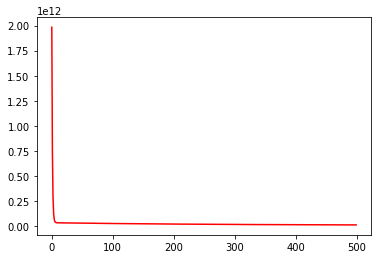

10990.541626528717 15129.172356238993


In [6]:
reg = LinearRegression(epochs = 500,learning_rate =0.01)
cost = reg.fit(X_train, y_train)
print(reg.w,reg.b)

In [7]:
pred = reg.predict(X_test)

In [8]:
print('Predictions:\n',pred)
print('Actual Y:\n',y_test)

Predictions:
 [ 50298.90556113  57992.2846997   39308.3639346   29416.87647073
 128331.75110948  50298.90556113]
Actual Y:
 [ 54445.  63218.  39891.  46205. 122391.  64445.]


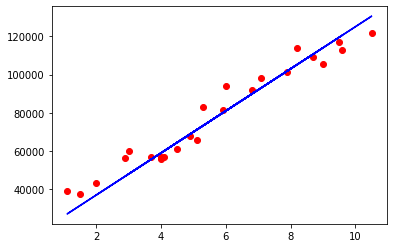

In [11]:
plt.scatter(X_train,y_train, color = 'r')
plt.plot(X_train,reg.predict(X_train), color = 'b')
plt.show()

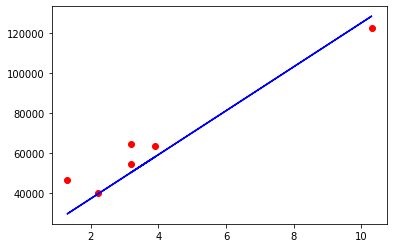

In [12]:
plt.scatter(X_test,y_test, color = 'r')
plt.plot(X_test,reg.predict(X_test), color = 'b')
plt.show()

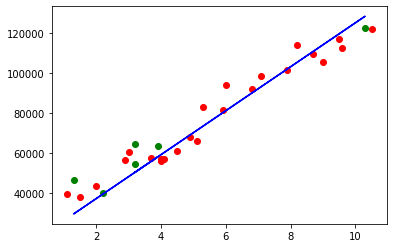

In [13]:
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_test, reg.predict(X_test), color = 'blue')